In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel("Height-Width.xlsx")

In [5]:
x = df[['Height']]
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [6]:
y = df['Weight']
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split as tts

In [10]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=5)

In [11]:
xtrain.head()

,Height
3466,67.172828
828,66.653234
2234,65.077902
3245,65.035786
1298,69.702258


In [12]:
xtest.head()

,Height
2730,63.914541
2008,66.416414
840,69.016067
2635,71.948486
1721,71.196587


In [13]:
ytrain.head()

3466    181.886241
828     160.147436
2234    165.313807
3245    168.618676
1298    177.149091
Name: Weight, dtype: float64

In [14]:
ytest.head()

2730    167.842391
2008    193.601091
840     196.763907
2635    208.204435
1721    191.683842
Name: Weight, dtype: float64

# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression


In [16]:
reg = LinearRegression()

In [17]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [18]:
m = reg.coef_

In [19]:
m

array([6.00809929])

In [20]:
c = reg.intercept_

In [21]:
c

-227.77595602223423

In [24]:
pred = reg.predict(xtest)
pred

array([156.22895255, 171.26045447, 186.87942774, ..., 205.60020285,
       186.14253731, 219.24585226])

In [25]:
df["Predicted Result"] = reg.predict(x)

In [26]:
df.head()

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.904254
1,68.781904,162.310473,185.472553
2,74.110105,212.740856,217.484915
3,71.730978,220.042470,203.190884
4,69.881796,206.349801,192.080812


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
mse = mean_squared_error(ytest, pred)

In [30]:
mse

102.60138482843213

In [31]:
mae = mean_absolute_error(ytest, pred)

In [32]:
mae

8.061150778858023

# Best fit line

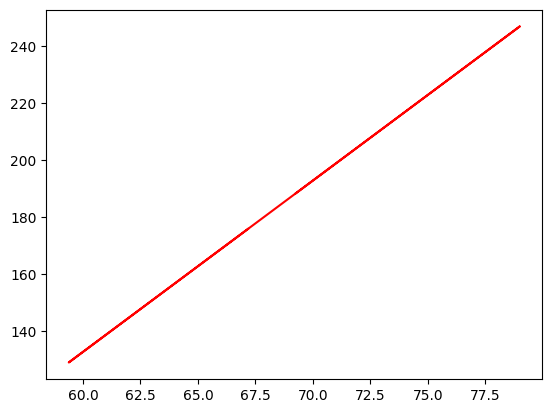

In [33]:
plt.plot(xtrain,reg.predict(xtrain),color="red")

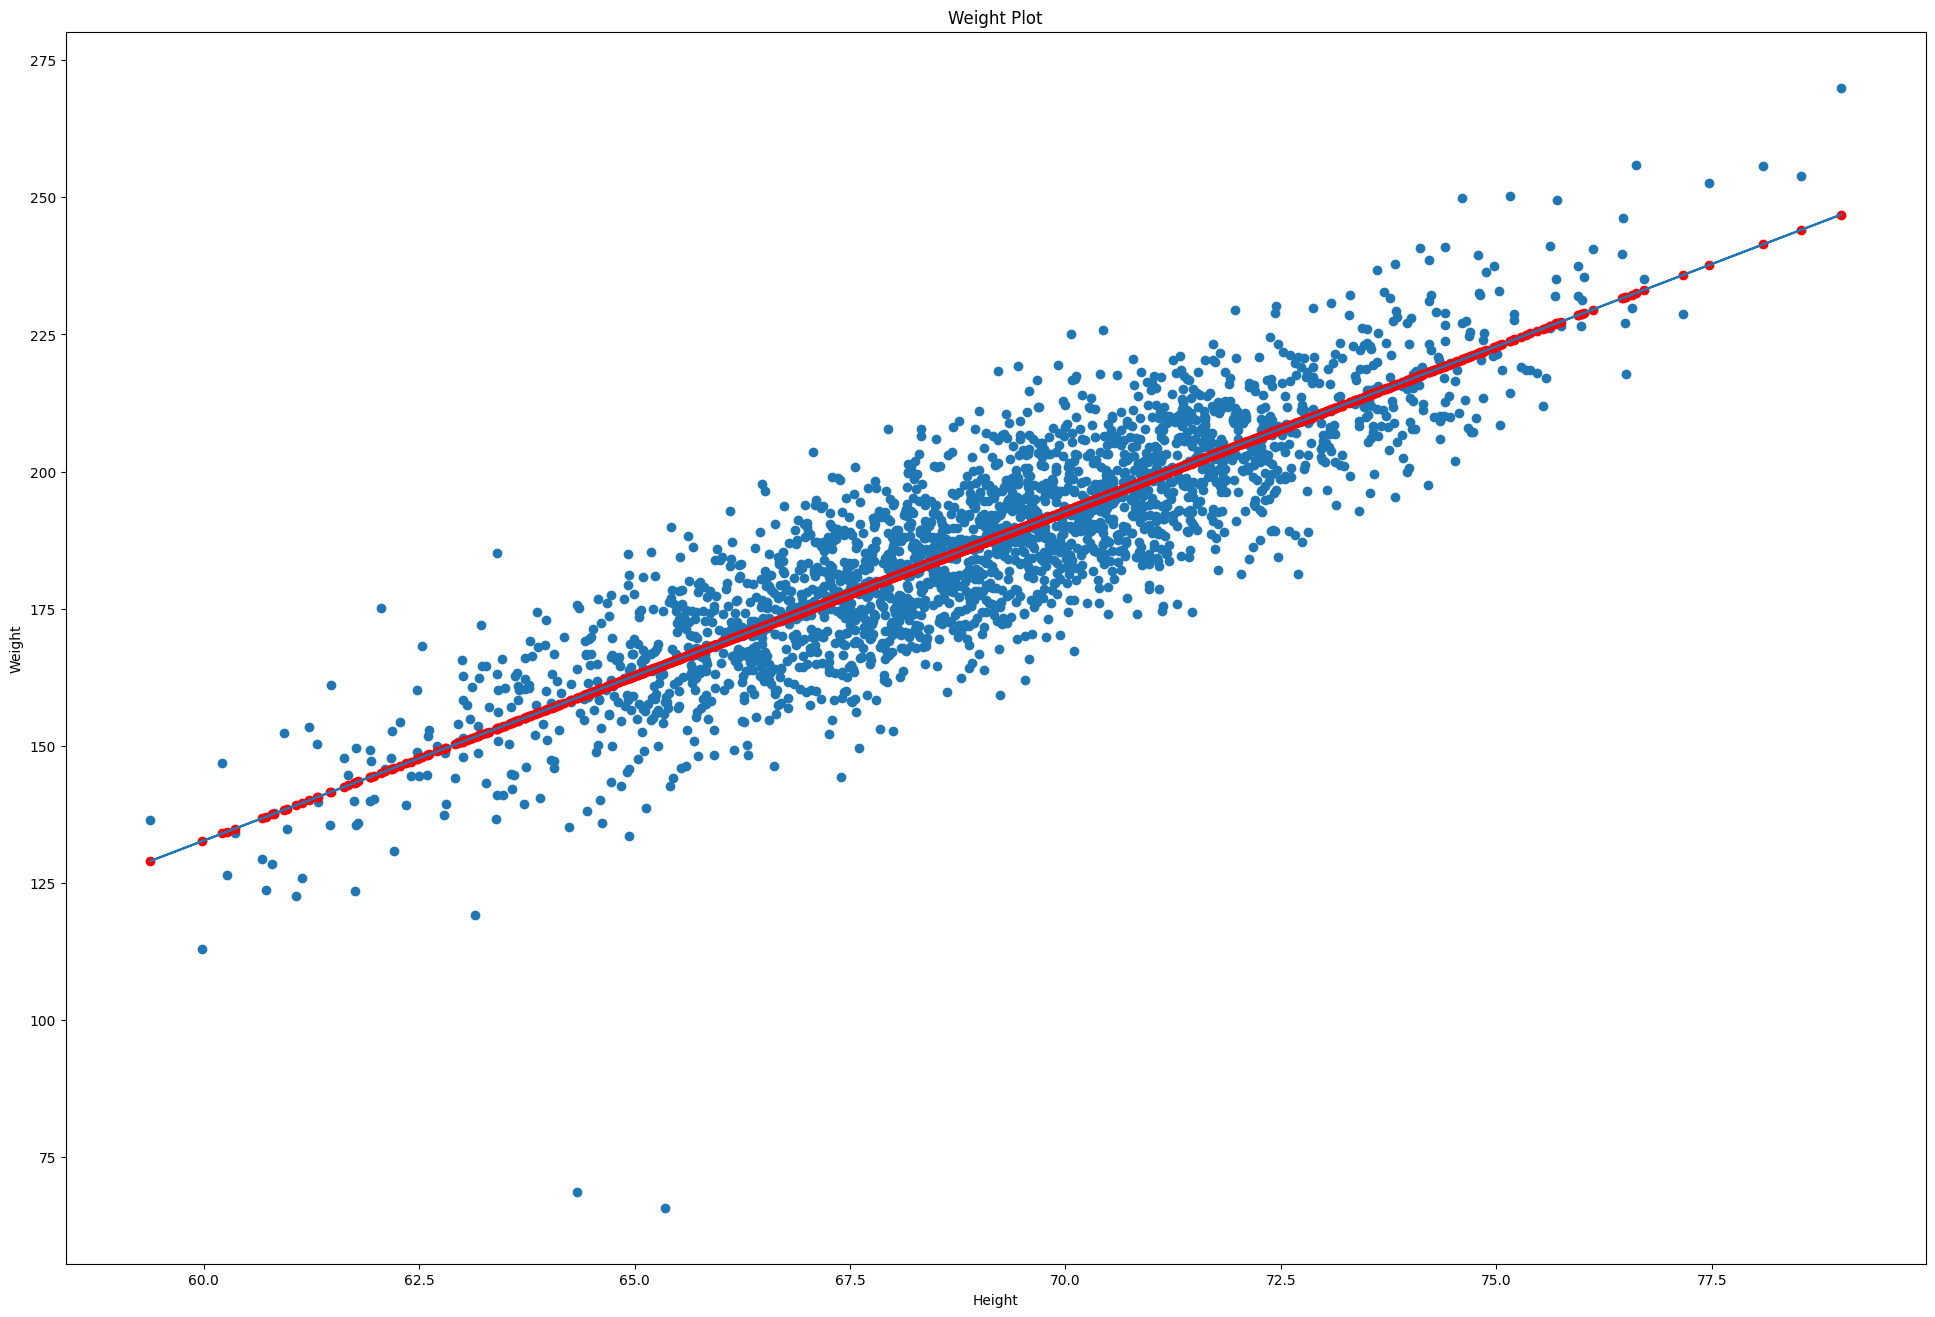

In [42]:
plt.figure(figsize=(24,16))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Weight Plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color="red")

# Accuracy

In [44]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.7302328605746943

# Save Model

In [45]:
import pickle as pk
import joblib as jb

In [48]:
pk.dump(reg,open("first","wb"))

In [50]:
reg2 = pk.load(open("first","rb"))

In [52]:
reg2.predict([[2000]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11788.42261415])

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
jb.dump(reg,"second")

['second']